# Bank Marketing Analysis

## Background

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Dataset can be founded in [here](https://archive.ics.uci.edu/dataset/222/bank+marketing).

**Plan**

The main objective of the project is to predict customer subscriptions to time deposits based on a direct marketing campaign conducted by a Portuguese banking institution via telephone. This goal translates into optimizing marketing resources, enhancing customer engagement strategies, and ultimately increasing the effectiveness of these campaigns. By leveraging historical data for a binary classification challenge, the project aims to effectively identify potential subscribers, improving campaign ROI and customer experience through targeted and informed promotion.

**Analyze**

### 2.1 Import, Load and Examine 

In [1]:
# Analysis
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# setting
sns.set_style("dark")

In [2]:
df = pd.read_csv("bank-full.csv", delimiter=";")
df 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df_small = pd.read_csv("bank.csv", delimiter=";")
df_small

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### 2.2 Data Cleaning

#### 2.2.1 Missing Values

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df_small.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing value for both dataset, so we don't need do any actions.

### 2.2.2 Outliers

We will check outliers by looking at categorical columns: any written or non-related value inside?

#### 2.2.2.1 Categorical Columns

In [8]:
# Check category of all columns are objects
columns_object = df.select_dtypes("object")

for columns in columns_object:
    print(f"Value counts for {columns}")
    print(df[columns].value_counts())
    print("\n")

Value counts for job
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64


Value counts for marital
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64


Value counts for education
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


Value counts for default
default
no     44396
yes      815
Name: count, dtype: int64


Value counts for housing
housing
yes    25130
no     20081
Name: count, dtype: int64


Value counts for loan
loan
no     37967
yes     7244
Name: count, dtype: int64


Value counts for contact
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64


Value counts for month
month
may    13766
jul     6895

No outliers in categorial columns were found. We will move on to numeric columns

#### 2.2.2.2 Numeric Columns

We will visualize the data distribution using histograms, which is a general way to start when looking for outliers.

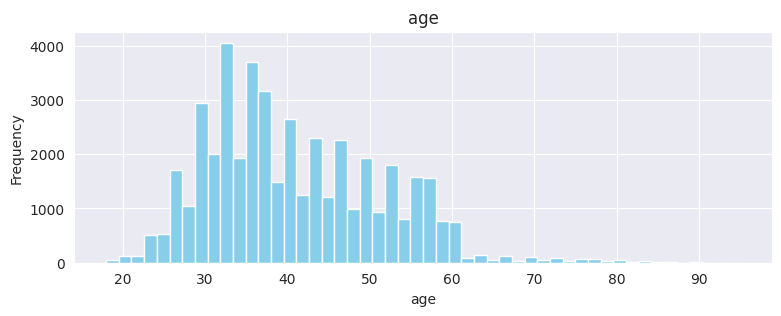

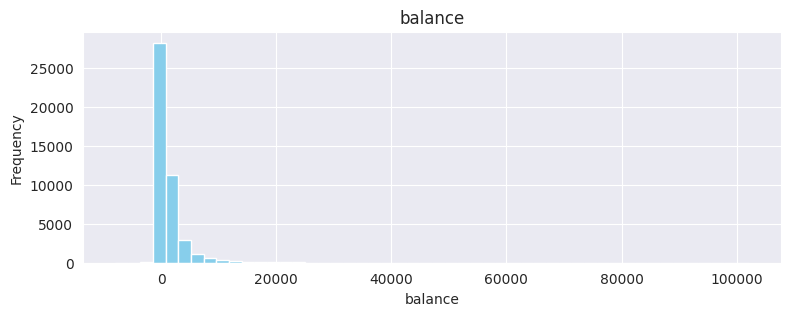

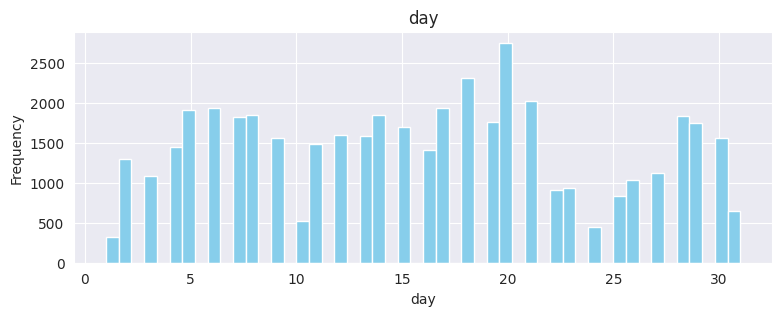

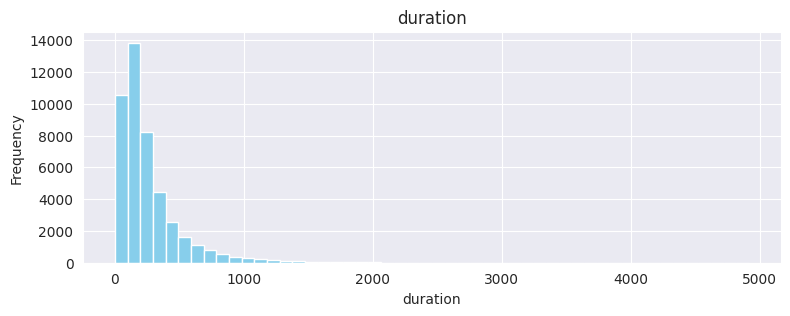

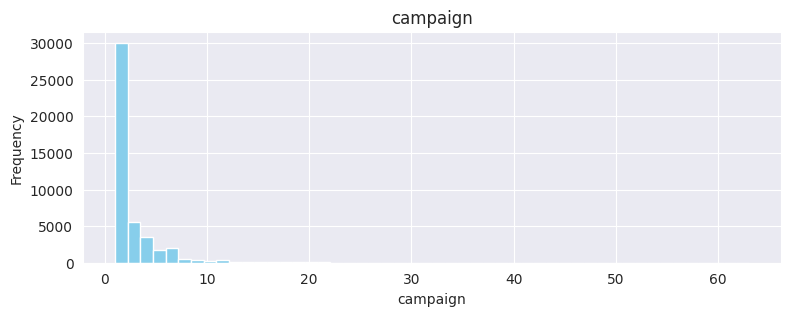

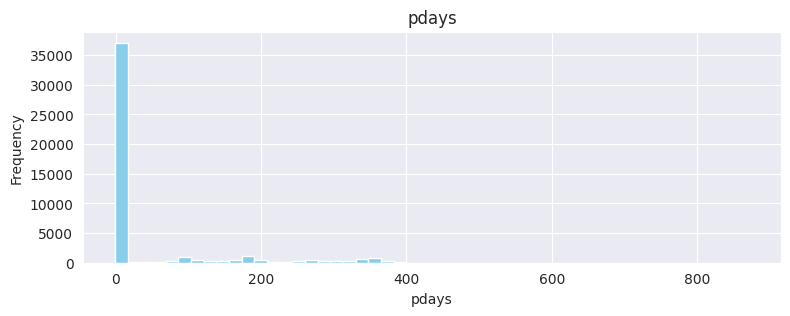

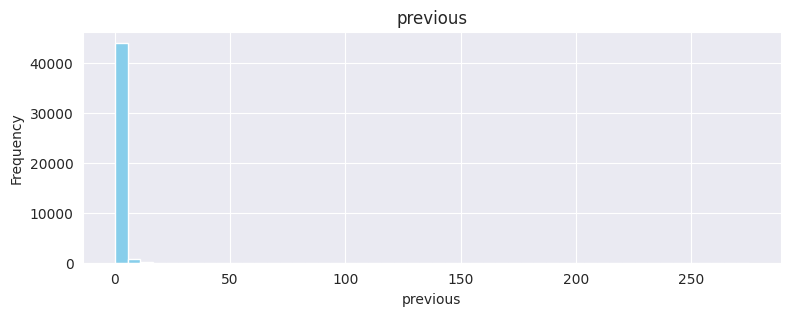

In [9]:
columns_numeric = df.select_dtypes("int")

for columns in columns_numeric:
    plt.figure(figsize=(9, 3))
    df[columns].hist(bins=50, color="skyblue")
    plt.title(columns)
    plt.xlabel(columns)
    plt.ylabel("Frequency")
    plt.show()


All the column's value seems normal, and no outliers were found in the graph ONLY.

Also, we can clearly know distrubution from each column, ex:
- `age` appears fairly normal but skewed to the right
- `balance` histogram shows a heavy concentration of values near zero
- All the graphs excrept `day` have strong Negative/left-skewed (a longer or fatter tail on the left side of the distribution)

But, we indeed find some potential outliers in the table. For example, the column `balance` is 75% only at 1428, but the max is 102127, which is not shown on the graph. And this may be considered an outlier because they are far from another number. On the other hand, the question is, in real life, a customer may be wealthy (rich people always have a small portion), which makes sense from this point. And banks can have VIPs. So, it's hard to say if we determine this is an outlier or not. We don't know how data was collected, so we might proceed without treating it as outliers.

### 2.3.3 Duplicates

In [10]:
df.duplicated().sum()

0

There are no duplicates.